In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan grafik yang lebih baik
sns.set(style="whitegrid")


In [2]:
data = pd.read_csv('ai4i2020.csv')

In [3]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

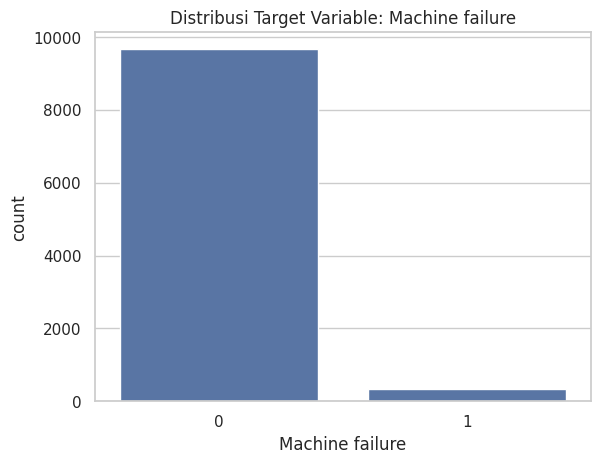

In [4]:
# Informasi umum tentang data
data.info()

# Statistik deskriptif
data.describe()

# Distribusi target variable 'Machine failure'
sns.countplot(x='Machine failure', data=data)
plt.title('Distribusi Target Variable: Machine failure')
plt.show()


In [5]:
# Memeriksa dan menangani nilai yang hilang
data.isnull().sum()

# Mengkodekan variabel kategorikal jika ada (dalam contoh ini tidak ada variabel kategorikal)

# Memisahkan fitur dan target
X = data.drop(['UDI', 'Product ID', 'Type', 'Machine failure'], axis=1)
y = data['Machine failure']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.57      0.13      0.21        61

    accuracy                           0.97      2000
   macro avg       0.77      0.56      0.60      2000
weighted avg       0.96      0.97      0.96      2000

Accuracy: 0.97


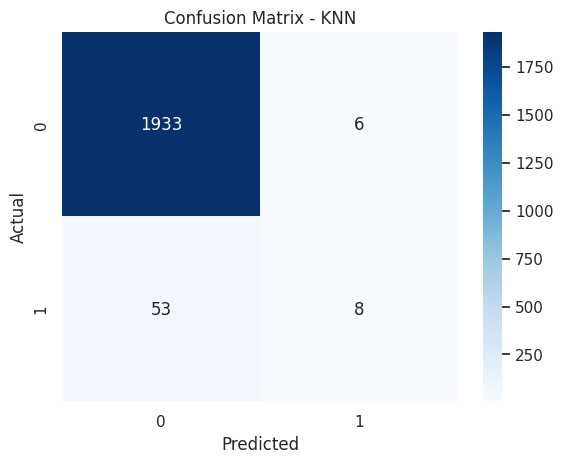

In [6]:
# Membuat dan melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Memprediksi pada data testing
y_pred_knn = knn_model.predict(X_test)

# Menampilkan laporan klasifikasi
print("K-Nearest Neighbors (KNN)")
print(classification_report(y_test, y_pred_knn))

# Menampilkan akurasi
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')

# Plot confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc


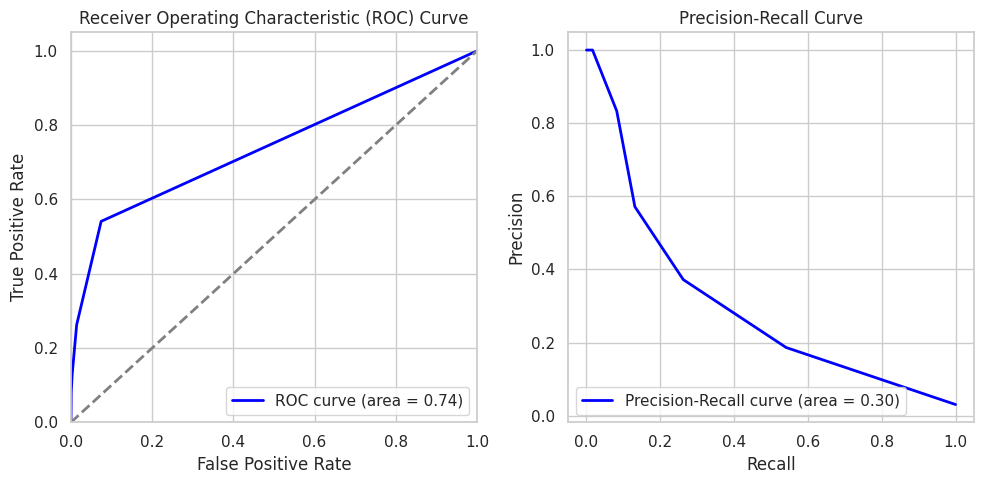

K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.57      0.13      0.21        61

    accuracy                           0.97      2000
   macro avg       0.77      0.56      0.60      2000
weighted avg       0.96      0.97      0.96      2000

Accuracy: 0.97


In [8]:
# Menggunakan KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn)
pr_auc_knn = auc(recall_knn, precision_knn)

plt.subplot(1, 2, 2)
plt.plot(recall_knn, precision_knn, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc_knn:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Menampilkan laporan klasifikasi
print("K-Nearest Neighbors (KNN)")
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')
